In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [3]:
training = keras.preprocessing.image_dataset_from_directory(
    'C:/Users/balaj/Documents/projects_1stop/training_set/training_set',
    validation_split=0.2,
    seed=123,
    interpolation='nearest',
    subset='training',
    batch_size=64,
    image_size=(256,256)
)

Found 8005 files belonging to 2 classes.
Using 6404 files for training.


In [4]:
validation = keras.preprocessing.image_dataset_from_directory(
    'C:/Users/balaj/Documents/projects_1stop/training_set/training_set',
    validation_split=0.2,
    seed=123,
    interpolation='nearest',
    subset='validation',
    batch_size=64,
    image_size=(256,256),
)

Found 8005 files belonging to 2 classes.
Using 1601 files for validation.


In [5]:
test = keras.preprocessing.image_dataset_from_directory(
    'C:/Users/balaj/Documents/projects_1stop/test_set/test_set',
    batch_size=64,
    image_size=(256,256),
    interpolation='nearest',
)

Found 2023 files belonging to 2 classes.


In [6]:
class_name = training.class_names

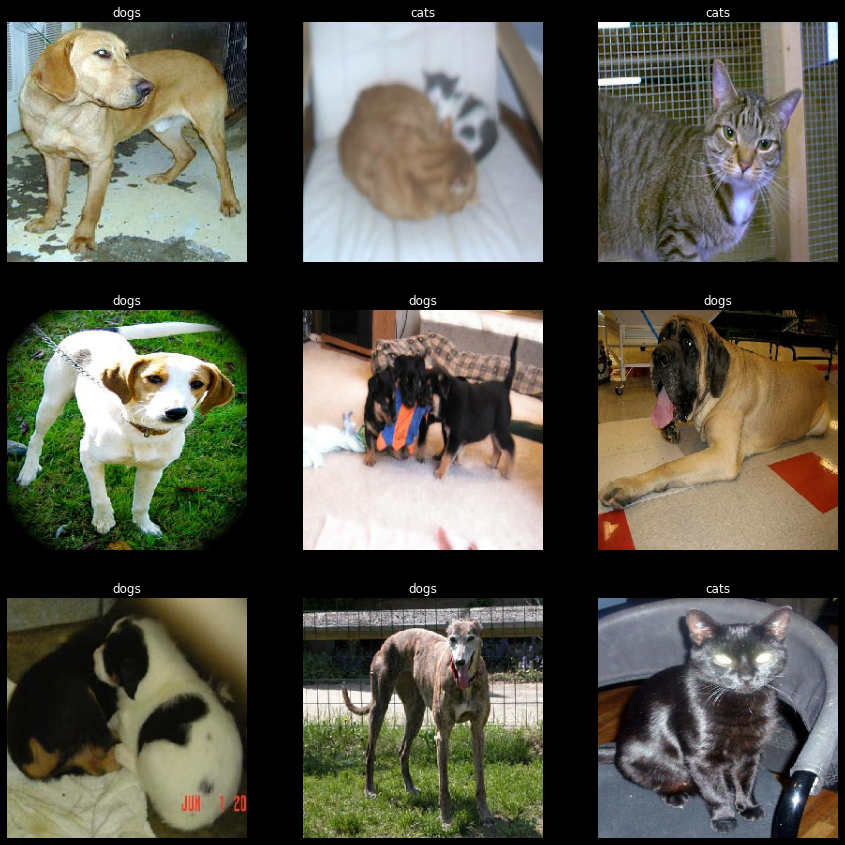

In [7]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

plt.figure(figsize=(15,15))
for img, label in training.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(img[i])
        plt.title(class_name[label[i]])
        plt.axis('off')

In [8]:
#initializing the cnn
classifier=Sequential()

In [9]:
from tensorflow.keras import models

In [10]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',\
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.compile(
    optimizer=tf.optimizers.Adam(epsilon=0.05),
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [12]:
#part2-fitting the cnn to the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [13]:
# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
# Creating training set
training_set = train_datagen.flow_from_directory('C:/Users/balaj/Documents/projects_1stop/training_set/training_set',
                                                 target_size = (150, 150),
                                                 batch_size = 20,
                                                 class_mode = 'binary')
# Creating the Test set
test_set = test_datagen.flow_from_directory('C:/Users/balaj/Documents/projects_1stop/test_set/test_set',
                                            target_size = (150, 150),
                                             batch_size = 20,
                                            class_mode = 'binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [14]:
for data_batch, labels_batch in training_set:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [15]:
history = model.fit_generator(
    training_set,
    steps_per_epoch=100,
    epochs=25,
    validation_data=test_set,
    validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
100/100 [==============================] - 110s 1s/step - loss: 0.6933 - binary_accuracy: 0.5080 - val_loss: 0.6925 - val_binary_accuracy: 0.5290
Epoch 2/25
100/100 [==============================] - 97s 975ms/step - loss: 0.6917 - binary_accuracy: 0.5165 - val_loss: 0.6910 - val_binary_accuracy: 0.5280
Epoch 3/25
100/100 [==============================] - 91s 912ms/step - loss: 0.6916 - binary_accuracy: 0.5300 - val_loss: 0.6899 - val_binary_accuracy: 0.5410
Epoch 4/25
100/100 [==============================] - 83s 832ms/step - loss: 0.6904 - binary_accuracy: 0.5194 - val_loss: 0.6885 - val_binary_accuracy: 0.5260
Epoch 5/25
100/100 [==============================] - 80s 799ms/step - loss: 0.6887 - binary_accuracy: 0.5600 - val_loss: 0.6881 - val_binary_accuracy: 0.5480
Epoch 6/25
100/100 [==============================] - 77s 768ms/step - loss: 0.6867 - binary_accuracy: 0.5540 - val_loss: 0.6837 - 

In [16]:
import matplotlib.pyplot as plt

<AxesSubplot:>

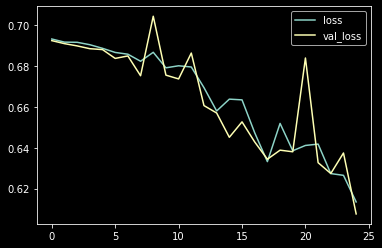

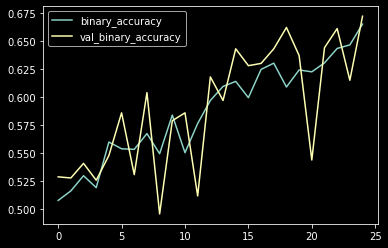

In [17]:
import pandas as pd
hist_df = pd.DataFrame(history.history)
hist_df.loc[:,['loss','val_loss']].plot()
hist_df.loc[:,['binary_accuracy','val_binary_accuracy']].plot()

In [21]:
import os

In [22]:
filenames = os.listdir("C:/Users/balaj/Documents/projects_1stop/test_set/test_set")

test_data = pd.DataFrame({
    'filename': filenames
})

In [23]:
model.save('new.h5')

In [24]:
model_new =keras.models.load_model('new.h5')

In [25]:
def get_class(img):
    img_arr = keras.preprocessing.image.img_to_array(img)
    img_arr = tf.expand_dims(img_arr, 0)
    pred = model_new.predict(img_arr)
    pred = (pred>0.5).astype(np.int)
    return class_name[pred[0][0]]

In [30]:
training_set.class_indices

{'cats': 0, 'dogs': 1}